In [10]:
import pandas as pd
import sys
sys.path.append("../Handlers")
import traintest

In [11]:
spam_assassin = pd.read_csv("./SpamAssassin.csv")

In [12]:
subject = "Subject"
body = "Body"
spam_assassin_input = spam_assassin.apply(lambda x: f"{x[subject]} {x[body]}", axis=1)
spam_assassin_input

0       Re: New Sequences Window     Date:        Wed,...
1       [zzzzteana] RE: Alexander Martin A posted:\nTa...
2       [zzzzteana] Moscow bomber Man Threatens Explos...
3       [IRR] Klez: The Virus That  Won't Die Klez: Th...
4       Re: Insert signature On Wed Aug 21 2002 at 15:...
                              ...                        
4193    Preferred Non-Smoker Rates for Smokers  \t Pre...
4194    How to get 10,000 FREE hits per day to any web...
4195    Cannabis Difference ****Mid-Summer Customer Ap...
4196    [ILUG] WILSON  KAMELA ATTN:SIR/MADAN      \n\n...
4197    nan mv 00001.317e78fa8ee2f54cd4890fdc09ba8176 ...
Length: 4198, dtype: object

In [13]:
cnn = traintest.ConvolutionalNNClassifier("SpamAssassin")
cnn.load_data(spam_assassin_input, spam_assassin["Is_spam"])

['Re: New Sequences Window     Date:        Wed, 21 Aug 2002 10:54:46 -0500\n    From:        Chris Garrigues \n    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>\n\n\n  | I can\'t reproduce this error.\n\nFor me it is very repeatable... (like every time, without fail).\n\nThis is the debug log of the pick happening ...\n\n18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}\n18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury\n18:19:04 Ftoc_PickMsgs {{1 hit}}\n18:19:04 Marking 1 hits\n18:19:04 tkerror: syntax error in expression "int ...\n\nNote, if I run the pick command by hand ...\n\ndelta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury\n1 hit\n\nThat\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m\nusing is ...\n\ndelta$ pick -version\npick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Su

In [14]:
cnn.split(test_size=0.1, valid_size=0.1)
cnn.vectorizing()

Shape of the input data is (3358, 200)


<tf.Tensor: shape=(3358, 200), dtype=int64, numpy=
array([[1643, 3362,    1, ...,    0,    0,    0],
       [ 286,   16,  115, ..., 3852,    6,  919],
       [  81,    2,  304, ...,    0,    0,    0],
       ...,
       [ 930,  372,    1, ...,    0,    0,    0],
       [1116,    7,  478, ...,    0,    0,    0],
       [   2,  208,  127, ...,    7,  745, 3686]], dtype=int64)>

In [15]:
cnn.build(
    dense_dropout=True, 
    dense_dropout_rate=0.4, 
    epochs=20,
    conv_layer_num=2,
    num_filters=[128, 64],
    filter_sizes=[5, 3],
    max_pooling=True,
    pooling_sizes=[2, 0]
)

Epoch 1/20


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.6942 - loss: 0.5410 - precision: 0.5696 - recall: 0.2217 - val_accuracy: 0.9619 - val_loss: 0.1212 - val_precision: 0.9363 - val_recall: 0.9608
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9707 - loss: 0.0846 - precision: 0.9584 - recall: 0.9535 - val_accuracy: 0.9619 - val_loss: 0.0839 - val_precision: 0.9477 - val_recall: 0.9477
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9956 - loss: 0.0200 - precision: 0.9947 - recall: 0.9921 - val_accuracy: 0.9643 - val_loss: 0.1004 - val_precision: 0.9423 - val_recall: 0.9608
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9974 - loss: 0.0059 - precision: 0.9933 - recall: 0.9989 - val_accuracy: 0.9714 - val_loss: 0.0952 - val_precision: 0.9490 - val_recall: 0.9739
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 0.0019 - precision: 0.9999 - recall: 1.0000 - val_accuracy: 0.9690 - val_loss: 0.1070 -

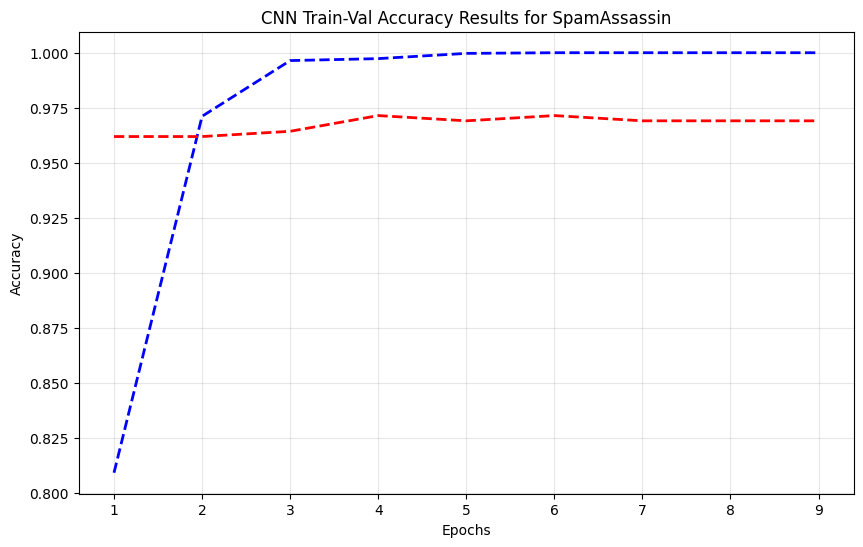

In [16]:
cnn.plot_training_validation_accuracy()

In [17]:
metrics = cnn.evaluate()
print(metrics)
del cnn

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
{'dataset': 'SpamAssassin', 'model': 'CNN', 'metrics': {'accuracy': 0.9642857142857143, 'weighted_precision': 0.9653173165401426, 'wighted_recall': 0.9642857142857143, 'weighted_f1': 0.9645069405476587, 'macro_precision': 0.9545591787439613, 'macro_recall': 0.9659668308787496, 'macro_f1': 0.9598927927985281, 'roc_auc': 0.9659668308787496}, 'confusion_matrix': array([[272,  11],
       [  4, 133]], dtype=int64), 'epochs': 9}


In [18]:
rnn = traintest.RecurrentNNClassifier("SpamAssassin")
rnn.load_data(spam_assassin_input, spam_assassin["Is_spam"])

['Re: New Sequences Window     Date:        Wed, 21 Aug 2002 10:54:46 -0500\n    From:        Chris Garrigues \n    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>\n\n\n  | I can\'t reproduce this error.\n\nFor me it is very repeatable... (like every time, without fail).\n\nThis is the debug log of the pick happening ...\n\n18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}\n18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury\n18:19:04 Ftoc_PickMsgs {{1 hit}}\n18:19:04 Marking 1 hits\n18:19:04 tkerror: syntax error in expression "int ...\n\nNote, if I run the pick command by hand ...\n\ndelta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury\n1 hit\n\nThat\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m\nusing is ...\n\ndelta$ pick -version\npick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Su

In [19]:
rnn.split(test_size=0.1, valid_size=0.1)
rnn.vectorizing()

Shape of the input data is (3358, 200)


<tf.Tensor: shape=(3358, 200), dtype=int64, numpy=
array([[1643, 3362,    1, ...,    0,    0,    0],
       [ 286,   16,  115, ..., 3852,    6,  919],
       [  81,    2,  304, ...,    0,    0,    0],
       ...,
       [ 930,  372,    1, ...,    0,    0,    0],
       [1116,    7,  478, ...,    0,    0,    0],
       [   2,  208,  127, ...,    7,  745, 3686]], dtype=int64)>

In [20]:
rnn.build(
    hidden_layer_num=2,
    hidden_sizes=[128, 64],
    epochs=20,
    lstm=False
)

Epoch 1/20


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


ValueError: Input 0 of layer "gru_1" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 128)

In [ ]:
rnn.plot_training_validation_acurracy()

In [ ]:
metrics = rnn.evaluate()
print(metrics)